In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
df=pd.read_csv("wine-clustering.csv")

In [598]:
df.shape

(178, 13)

In [599]:
nul=df.isna().sum()
nul

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [600]:
dup=df.duplicated().sum()
dup

np.int64(0)

In [601]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

print(scaled_df.head())

    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.013009  
1  0.406051  1.113449  0.96524

np.float64(-0.05148233107713203)

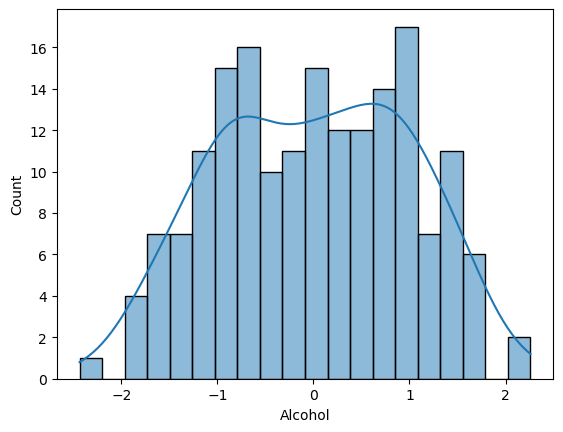

In [602]:
sns.histplot(data=scaled_df,x='Alcohol',bins=20,kde=True)
scaled_df['Alcohol'].skew()

np.float64(0.021091272199708615)

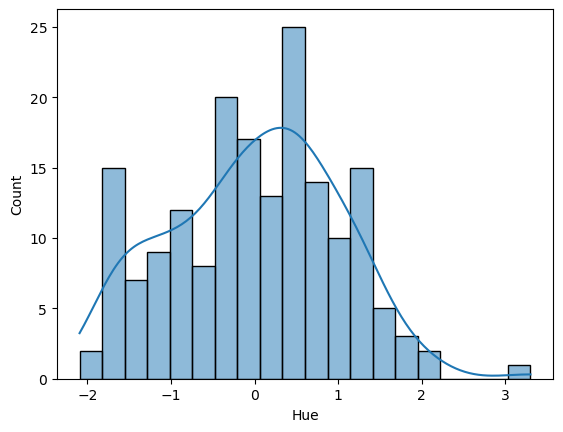

In [603]:
sns.histplot(data=scaled_df,x='Hue',bins=20,kde=True)
scaled_df['Hue'].skew()

np.float64(0.4501513355621222)

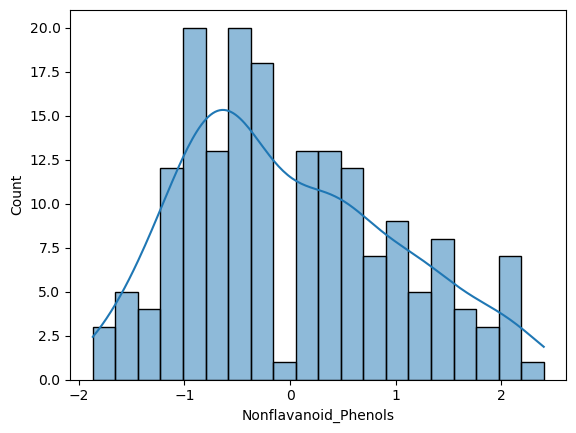

In [604]:
sns.histplot(data=scaled_df,x='Nonflavanoid_Phenols',bins=20,kde=True)
scaled_df['Nonflavanoid_Phenols'].skew()

np.float64(0.6057231291674979)

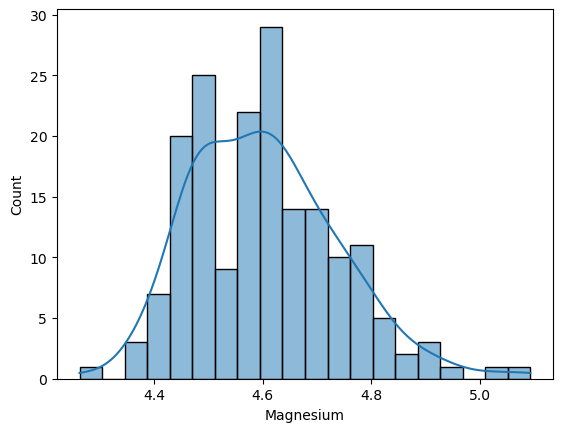

In [605]:
df['Magnesium']=np.log(df['Magnesium']+1)
sns.histplot(data=df,x='Magnesium',bins=20,kde=True)
df['Magnesium'].skew()

np.float64(0.08663858640245259)

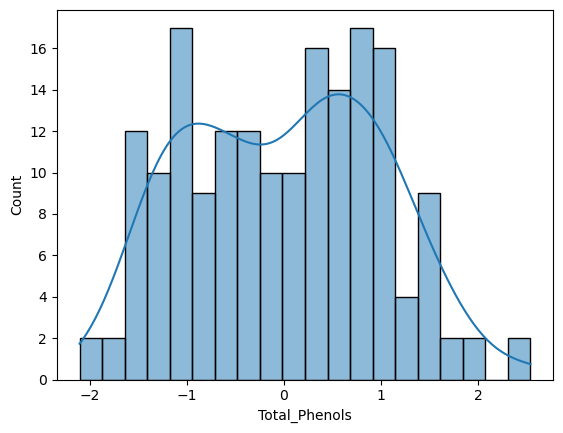

In [606]:
sns.histplot(data=scaled_df,x='Total_Phenols',bins=20,kde=True)
scaled_df['Total_Phenols'].skew()

np.float64(0.517137172299898)

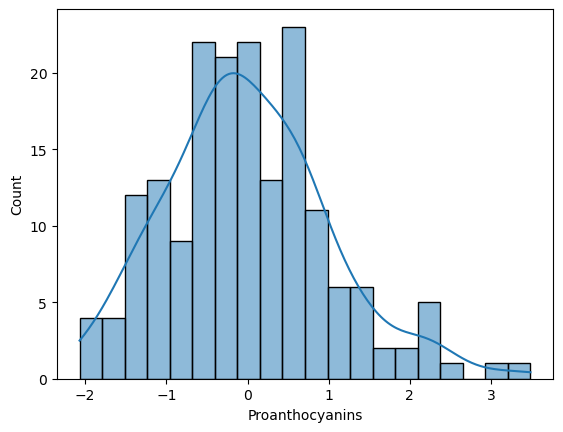

In [607]:
sns.histplot(data=scaled_df,x='Proanthocyanins',bins=20,kde=True)
scaled_df['Proanthocyanins'].skew()

np.float64(1.0396511925814444)

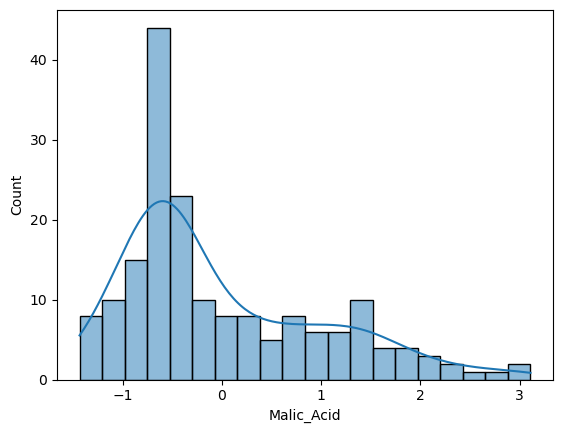

In [608]:
df['Malic_Acid']=np.log(df['Malic_Acid']+1)
sns.histplot(data=scaled_df,x='Malic_Acid',bins=20,kde=True)
scaled_df['Malic_Acid'].skew()

np.float64(0.7678217813897327)

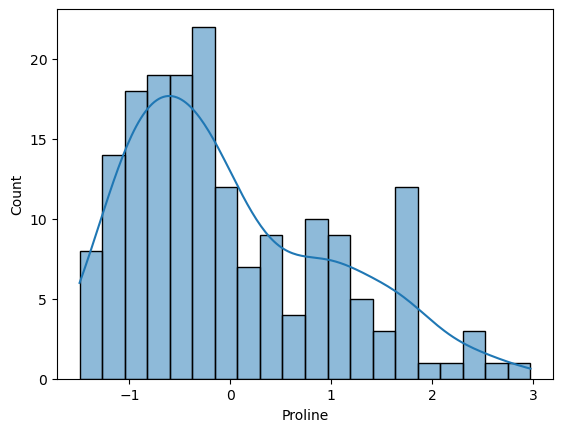

In [609]:
df['Proline']=np.log(df['Proline']+1)
sns.histplot(data=scaled_df,x='Proline',bins=20,kde=True)
scaled_df['Proline'].skew()

<Axes: >

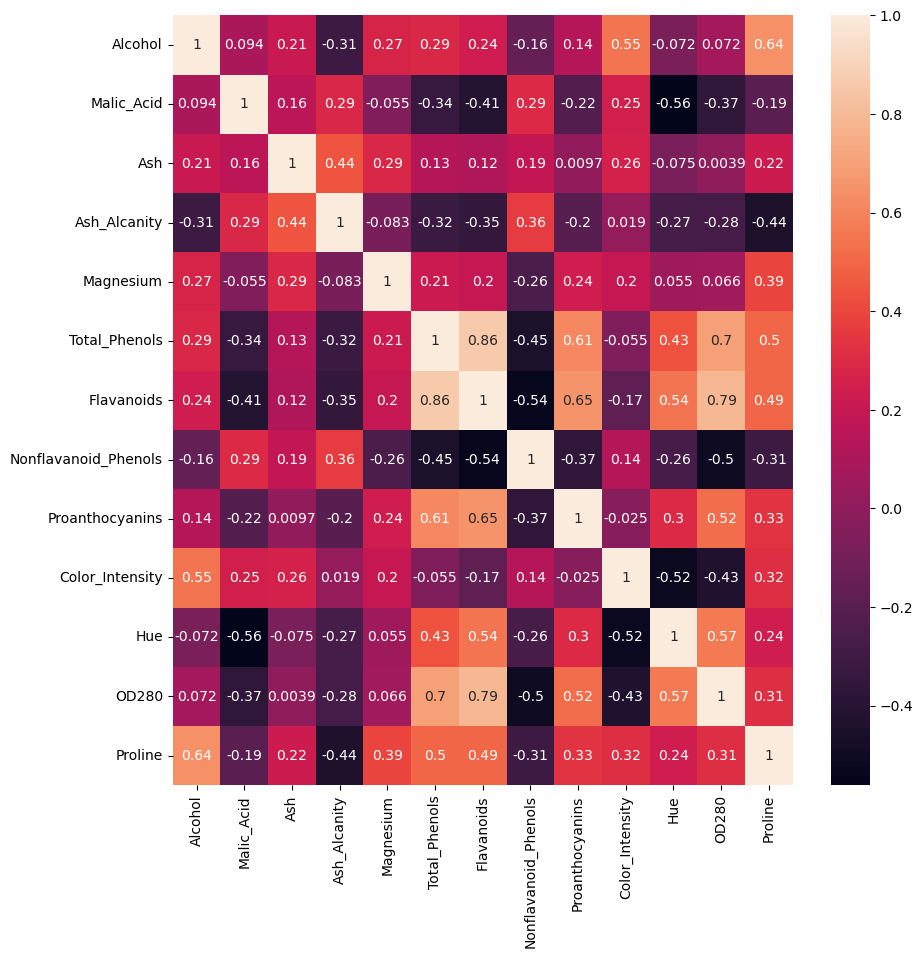

In [610]:
corr=scaled_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [611]:
scaled_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

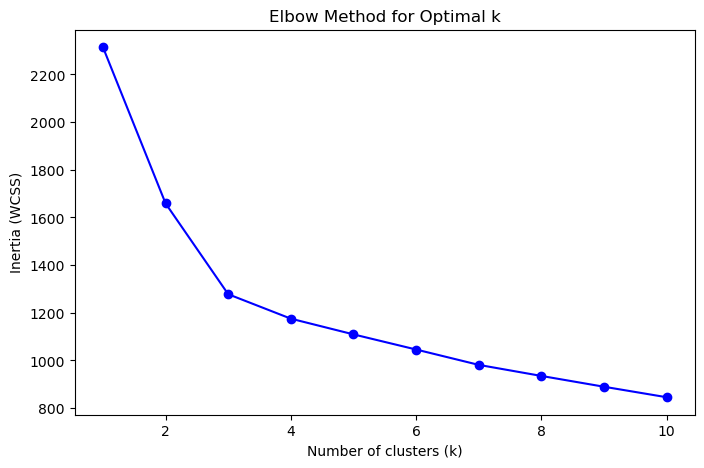

In [612]:
X = scaled_df.select_dtypes(include=['float64', 'int64'])

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


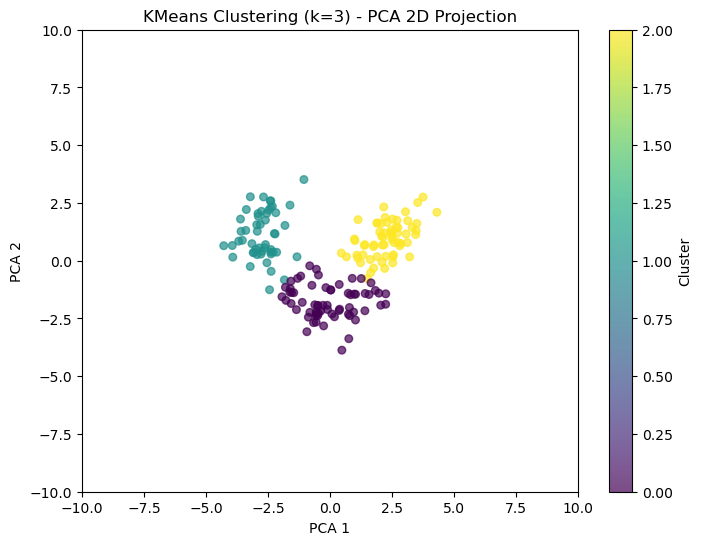

In [ ]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20)
labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", s=30, alpha=0.7)
plt.title(f"KMeans Clustering (k={best_k}) - PCA 2D Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()


c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=2, silhouette score=0.2593
k=3, silhouette score=0.2849
k=4, silhouette score=0.2586
k=5, silhouette score=0.2315


c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

k=6, silhouette score=0.2372
k=7, silhouette score=0.2036
k=8, silhouette score=0.1570


c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=9, silhouette score=0.1499
k=10, silhouette score=0.1436


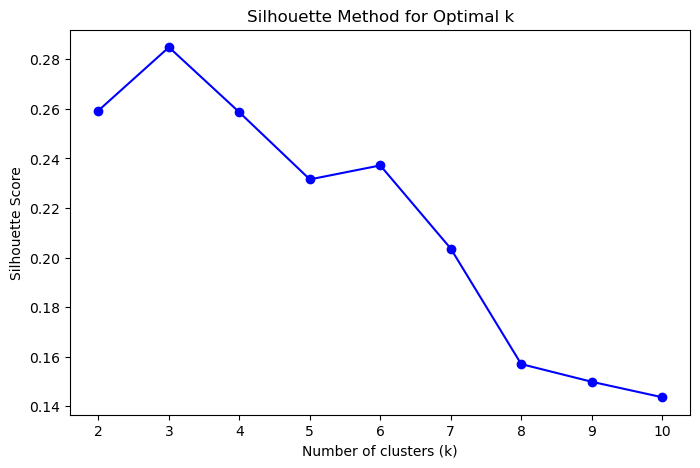

In [614]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette score={score:.4f}")

plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()

k=2, silhouette score=0.2670
k=3, silhouette score=0.2774
k=4, silhouette score=0.2258
k=5, silhouette score=0.1867
k=6, silhouette score=0.1797
k=7, silhouette score=0.1869
k=8, silhouette score=0.1883
k=9, silhouette score=0.1917
k=10, silhouette score=0.1986


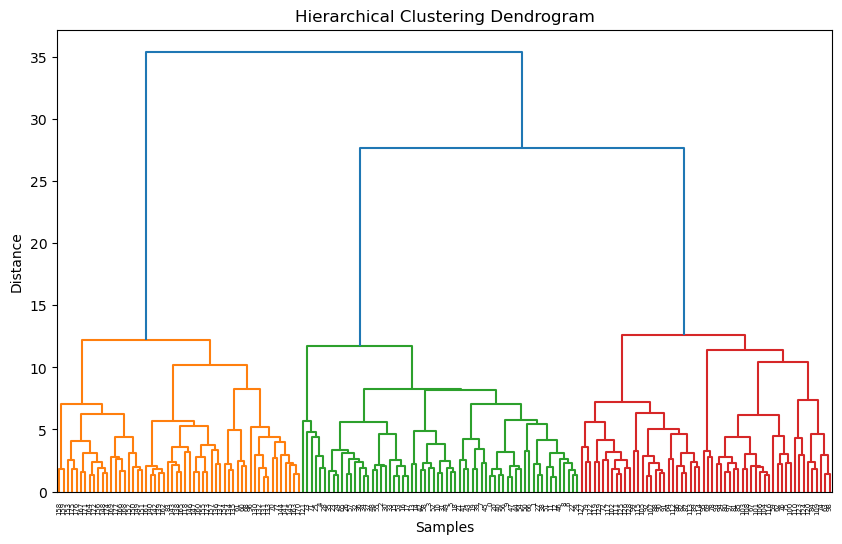

In [615]:

silhouette_scores = []
K = range(2, 11)

for k in K:
    hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = hc.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette score={score:.4f}")

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


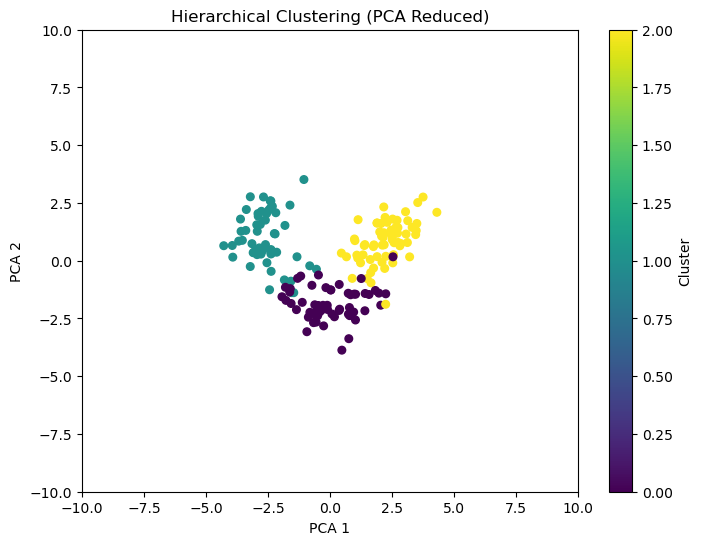

In [624]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

hc = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels_hc = hc.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_hc, cmap='viridis', s=30)
plt.title("Hierarchical Clustering (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.colorbar(label="Cluster")
plt.show()


In [617]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

pca = PCA(n_components=5)   
X_pca = pca.fit_transform(X_scaled)

for eps in [0.5, 1.0, 1.5, 2.0]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_pca)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        score = silhouette_score(X_pca, labels)
        print(f"eps={eps}: {n_clusters} clusters, silhouette={score:.4f}")
    else:
        print(f"eps={eps}: only one cluster found")

eps=0.5: only one cluster found
eps=1.0: 7 clusters, silhouette=-0.1254
eps=1.5: 2 clusters, silhouette=0.2509
eps=2.0: only one cluster found


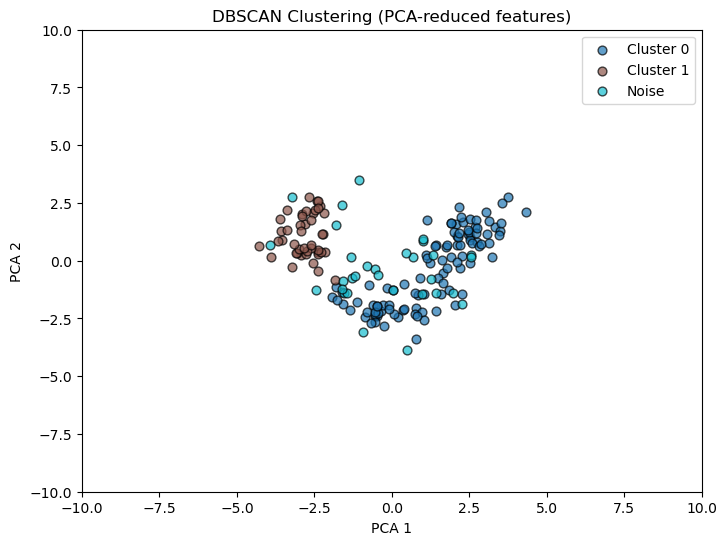

In [625]:
pca = PCA(n_components=5)  
X_pca = pca.fit_transform(X_scaled)

dbscan = DBSCAN(eps=1.5, min_samples=5)  
labels = dbscan.fit_predict(X_pca)

X_plot = PCA(n_components=2).fit_transform(X_pca)

plt.figure(figsize=(8,6))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = (labels == lab)
    plt.scatter(X_plot[mask, 0], X_plot[mask, 1],
                c=[col], label=f"Cluster {lab}" if lab != -1 else "Noise",
                s=40, alpha=0.7, edgecolors="k")

plt.title("DBSCAN Clustering (PCA-reduced features)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.legend()
plt.show()

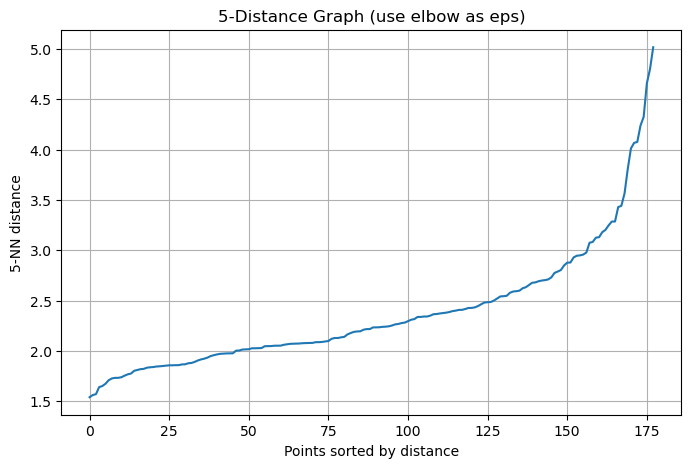

In [626]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

k = 5  # use same as min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, k-1])  # take kth NN distance
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.ylabel(f"{k}-NN distance")
plt.xlabel("Points sorted by distance")
plt.title(f"{k}-Distance Graph (use elbow as eps)")
plt.grid(True)
plt.show()
